In [1]:
# Script Name: Assignment 10
# Purpose of script: Complete Assignment 10 for Econ 320
# Author: Gavin Mason
# Date Created: 11/29/2022
# Notes:

# Packages
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [17]:
birthday = 11212001
rng = np.random.RandomState(int(birthday))
n = 1000000
b0 = 3
b1 = 0
b2 = 2
a0 = 2
a1=.8
x1 = rng.normal(10,1**0.5,n)
u = rng.normal(0,1**0.5,n)
u1 = rng.normal(0,1**0.5,n)
x2 = a0 + a1*x1 + u1
y = b0 + b1*x1 + b2*x2 + u
population_data = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'u':u, 'u1':u1})

In [18]:
sample_df = population_data.sample(n = 1000)
reg = smf.ols(formula='y ~ x1 + x2', data = sample_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     3217.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:21:28   Log-Likelihood:                -1429.4
No. Observations:                1000   AIC:                             2865.
Df Residuals:                     997   BIC:                             2880.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1355      0.330      9.495      0.000       2.487       3.783
x1            -0.0778      0.041     -1.886      0.060      -0.159       0.003
x2             2.0647      0.032     63.679      0.000       2.001       2.128
==============================================================================
Omnibus:                        2.158   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                2.204
Skew:                          -0.111   Prob(JB):                        0.332
Kurtosis:                       2.942   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Sample_Beta1 = -0.037324
b1r = []
for i in range(1000):
    sample_df = population_data.sample(n = 1000)
    reg = smf.ols(formula='y ~ x1 + x2', data = sample_df).fit()
    b1r.append(reg.params[1])
b1_df = pd.DataFrame({'sample beta1' : b1r})
b1_df.sample(1)

,sample beta1
208,-0.037324


In [25]:
reg.conf_int(alpha=0.1, cols=None)

,0,1
Intercept,2.591777,3.679123
x1,-0.145760,-0.009880
x2,2.011344,2.118108


In [24]:
#Fail to reject the null hypothesis that b1=0
b = reg.params
se = reg.bse
tstat = b[1] / se[1]
print(f'tstat: \n{tstat}\n')
print(reg.nobs-3-1)
pval = 2 * stats.t.cdf(-abs(tstat), 996)
print(f'pval: \n{np.around(pval,4)}\n')
tstat1 = -0.037324 / se[1]
print(f'tstat1: \n{tstat1}\n')

tstat: 
-1.885814902062806

996.0
pval: 
0.0596

tstat1: 
-0.9044703225083577



In [26]:
birthday = 11212001
rng = np.random.RandomState(int(birthday))
n = 1000000
b0 = 3
b1 = 2
b2 = 2
a0 = 2
a1=.8
x1 = rng.normal(10,1**0.5,n)
u = rng.normal(0,1**0.5,n)
u1 = rng.normal(0,1**0.5,n)
x2 = a0 + a1*x1 + u1
y = b0 + b1*x1 + b2*x2 + u
population_data = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'u':u, 'u1':u1})

In [40]:
b10 = []
for i in range(1000):
    sample_df = population_data.sample(n = 10)
    reg = smf.ols(formula='y ~ x1 + x2', data = sample_df).fit()
    b10.append(reg.params[1])


0.27175690440128564

In [41]:
b100 = []

for i in range(1000):
    sample_df = population_data.sample(n = 100)
    reg = smf.ols(formula='y ~ x1 + x2', data = sample_df).fit()
    b100.append(reg.params[1])
np.var(b100)

0.018387263629784188

In [42]:
b1000 = []

for i in range(1000):
    sample_df = population_data.sample(n = 1000)
    reg = smf.ols(formula='y ~ x1 + x2', data = sample_df).fit()
    b1000.append(reg.params[1])
np.var(b1000)

0.0016280994013965298

In [43]:
b10000 = []
for i in range(1000):
    sample_df = population_data.sample(n = 10000)
    reg = smf.ols(formula='y ~ x1 + x2', data = sample_df).fit()
    b10000.append(reg.params[1])
np.var(b10000)

0.00015783902138488204

<AxesSubplot:ylabel='Frequency'>

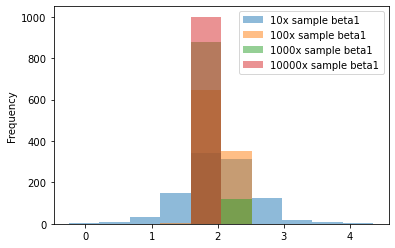

In [48]:
b1_df = pd.DataFrame({'10x sample beta1' : b10,
                     '100x sample beta1' : b100,
                     '1000x sample beta1' : b1000,
                     '10000x sample beta1' : b10000})
b1p = b1_df.plot.hist(bins=10, alpha=.5)
b1p

In [59]:
b1_df1 = [10, 100, 1000, 10000]
b1df11 = [np.var(b10), np.var(b100), np.var(b1000), np.var(b10000)]
b1_df12 = pd.DataFrame({'Sample Size': b1_df1,
                       'Empirical Variance of Sample Beta1' : b1df11})
b1_df12.head()

,Sample Size,Empirical Variance of Sample Beta1
0,10,0.271757
1,100,0.018387
2,1000,0.001628
3,10000,0.000158


<AxesSubplot:xlabel='Sample Size', ylabel='Empirical Variance of Sample Beta1'>

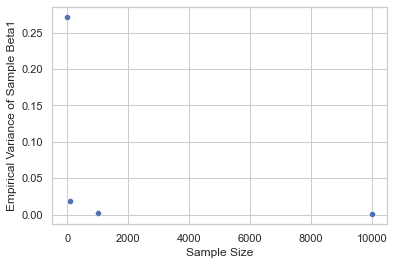

In [63]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x="Sample Size", y="Empirical Variance of Sample Beta1", data=b1_df12)